<a href="https://colab.research.google.com/github/shintafiaa/Teaching-Assistant-Technobar/blob/main/Technobar/6_XGBoost_data_melb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

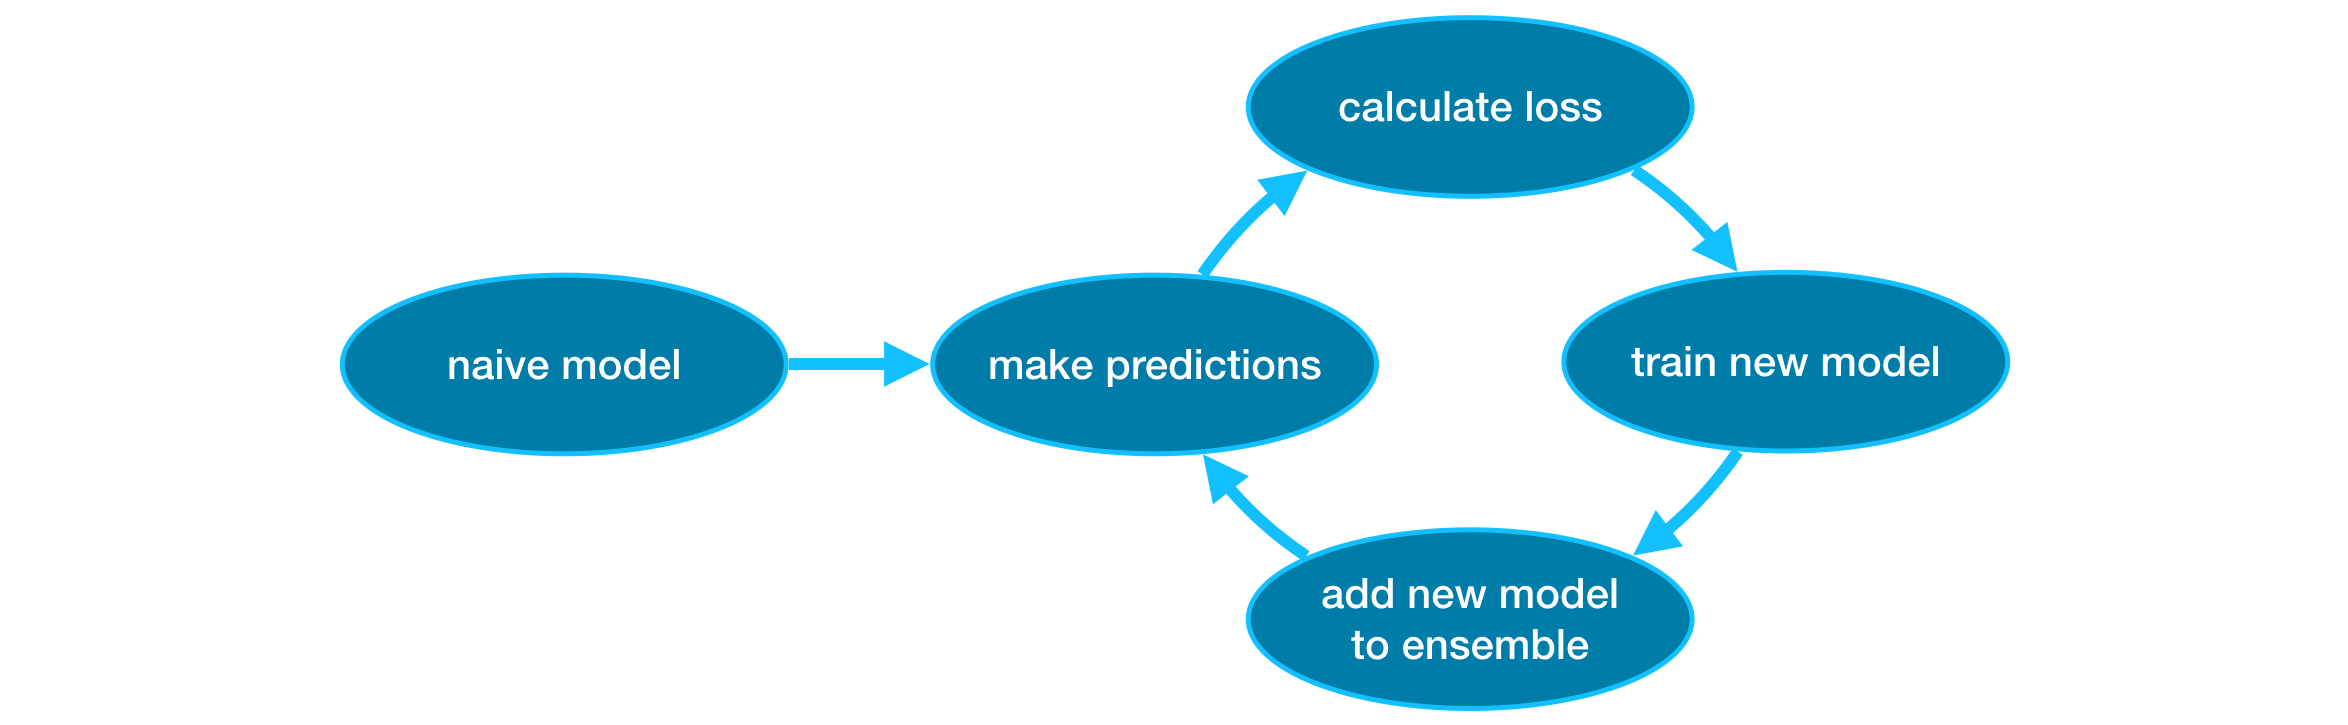

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

**Prompt:**

Write a code cell to mount Google Drive in Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Prompt:**

Write a code cell to read a CSV file from Google Drive into a DataFrame.

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Week 7/melb_data.csv'
data = pd.read_csv(file_path)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


**Prompt:**

Write a code cell to select a subset of predictors ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt'] and set the target variable ['Price'] from the DataFrame.

In [ ]:
# Define predictors and target
predictors = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt']
target = ['Price']

# Select predictors and target from the DataFrame
X = data[predictors]
y = data[target]

# Display the first few rows
X.head(), y.head()

(   Rooms  Distance  Landsize  BuildingArea  YearBuilt
 0      2       2.5     202.0           NaN        NaN
 1      2       2.5     156.0          79.0     1900.0
 2      3       2.5     134.0         150.0     1900.0
 3      3       2.5      94.0           NaN        NaN
 4      4       2.5     120.0         142.0     2014.0,
        Price
 0  1480000.0
 1  1035000.0
 2  1465000.0
 3   850000.0
 4  1600000.0)

**Prompt:**

Write a code cell to split the data into training and validation

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of splits
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((10864, 5), (2716, 5), (10864, 1), (2716, 1))

In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


**Prompt:**

Write a code cell to train the model using XGBoost, and print the mean absolute error on the validation set.

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Train the XGBoost regressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions and calculate MAE
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 230850.8424498343


We also make predictions and evaluate the model.

#Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

`n_estimators`
Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

**Prompt:**

Write a code cell to create another XGBRegressor with 500 estimators, train it, and print the mean absolute error on the validation set.

In [ ]:
# Train another XGBoost regressor with 500 estimators
model_500 = XGBRegressor(n_estimators=500, random_state=42)
model_500.fit(X_train, y_train)

# Make predictions and calculate MAE
y_pred_500 = model_500.predict(X_val)
mae_500 = mean_absolute_error(y_val, y_pred_500)
print(f"Mean Absolute Error (500 estimators): {mae_500}")

Mean Absolute Error (500 estimators): 243749.46732326952


The MAE result of the model with n_estimators set to 500 turned out to be greater than the default value of n_estimators, which is 100.

The MAE (Mean Absolute Error) of the model with an n_estimators value of 110 turns out to be smaller than the default n_estimators value of 100, as well as n_estimators with a value of 500.

`early_stopping_rounds`
offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stop improving, even if we aren't the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration (keburukan) to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores. This is done by setting the `eval_set` parameter.

We can modify the example above to include early stopping.

---
Note:

* In the context of training machine learning models, "deteriorating" refers to a situation where the performance of the model on a validation dataset worsens over consecutive iterations during the training process. Typically, we monitor a metric (such as accuracy, mean squared error, etc.) on the validation dataset to evaluate the model's performance.

* In the given code, verbose=False is an argument passed to the fit method of the XGBRegressor model. Setting verbose to False means that during the training process, the model will not produce any output or progress messages. It will train silently without displaying information about each boosting round.

`n_jobs`

On larger datasets where runtime is a consideration, you can use parallelism to build your model faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.

Here's the modified example.

**Prompt:**

Write a code cell to train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds, and print the mean absolute error on the validation set.

In [ ]:
from xgboost import DMatrix, train
from sklearn.metrics import mean_absolute_error

# Convert data into DMatrix
y_train_flat = y_train.values.ravel()
y_val_flat = y_val.values.ravel()
train_dmatrix = DMatrix(data=X_train, label=y_train_flat)
val_dmatrix = DMatrix(data=X_val, label=y_val_flat)

# Set parameters for the model
params = {
    "objective": "reg:squarederror",
    "learning_rate": 0.1,
    "max_depth": 6,
    "n_estimators": 90,
    "random_state": 42
}

# Train the model with early stopping
model_custom = train(
    params=params,
    dtrain=train_dmatrix,
    num_boost_round=90,
    evals=[(train_dmatrix, "train"), (val_dmatrix, "validation")],
    early_stopping_rounds=10,
    verbose_eval=False
)

# Make predictions and calculate MAE
preds = model_custom.predict(val_dmatrix)
mae_custom = mean_absolute_error(y_val_flat, preds)
print(f"Mean Absolute Error (Custom model): {mae_custom}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:44:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Absolute Error (Custom model): 237876.43505499815


Visualize Feature Importance

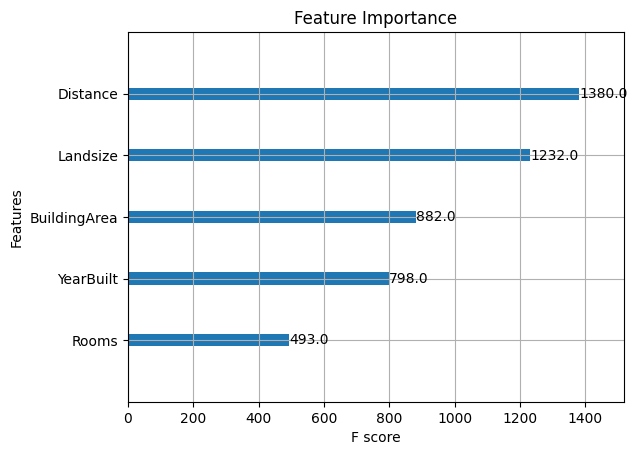

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plot_importance(model)
plt.title("Feature Importance")
plt.show()


### **1. Feature Importance**
**Penjelasan:**
- Plot ini menunjukkan kontribusi atau pentingnya setiap fitur dalam memprediksi target (`Price`) berdasarkan nilai **F-score**.
- Fitur **Distance** memiliki pengaruh terbesar dengan skor 1380. Hal ini menunjukkan bahwa jarak memiliki hubungan signifikan terhadap harga properti.
- **Landsize** dan **BuildingArea** juga penting, namun pengaruhnya lebih kecil dibandingkan Distance.
- **Rooms** memiliki pengaruh paling kecil di antara fitur-fitur lainnya, dengan F-score 493.

**Kesimpulan:**
- Fokus pada fitur Distance dan Landsize jika ingin memahami lebih lanjut faktor yang memengaruhi prediksi harga.




Visualize Tree Structure

<Figure size 4000x2000 with 0 Axes>

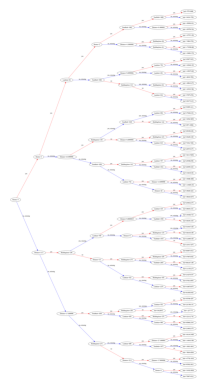

In [ ]:
from xgboost import plot_tree

# Visualize the tree structure of the model
plt.figure(figsize=(40, 20))  # Increase figure size for clarity
plot_tree(model, num_trees=0, rankdir='LR')
plt.show()


### **2. Tree Structure**
**Penjelasan:**
- Diagram ini menunjukkan salah satu pohon keputusan yang dihasilkan oleh model XGBoost.
- Node bercabang berdasarkan fitur dan nilai split, dengan kondisi tertentu yang memutuskan jalur berikutnya.
- Warna merah dan biru menunjukkan nilai prediksi atau probabilitas, dengan merah sebagai nilai yang lebih tinggi dan biru lebih rendah.

**Kesimpulan:**
- Struktur pohon menunjukkan bagaimana model memutuskan prediksi harga berdasarkan fitur seperti Distance, Landsize, dan lainnya.
- Model ini cukup kompleks dengan banyak cabang, yang memungkinkan akurasi tinggi tetapi juga menunjukkan potensi overfitting jika tidak dikendalikan.



Learning Curve

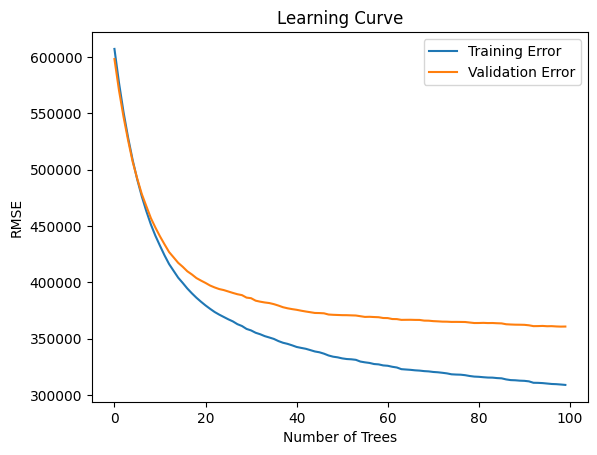

In [ ]:
# Use the eval_set during training for the learning curve
eval_set = [(X_train, y_train_flat), (X_val, y_val_flat)]
model_learning = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_learning.fit(X_train, y_train_flat, eval_set=eval_set, verbose=False)

# Extract results
results = model_learning.evals_result()

# Plot learning curve
plt.plot(results['validation_0']['rmse'], label='Training Error')
plt.plot(results['validation_1']['rmse'], label='Validation Error')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()


### **3. Learning Curve**
**Penjelasan:**
- Kurva ini menunjukkan **Root Mean Squared Error (RMSE)** pada data training dan validation terhadap jumlah pohon yang digunakan (number of trees).
- **Training Error** (garis biru) menurun dengan cepat di awal dan terus berkurang seiring bertambahnya pohon.
- **Validation Error** (garis oranye) juga menurun di awal namun mulai stabil di sekitar 350.000 RMSE.

**Kesimpulan:**
- Model XGBoost berhasil belajar dengan baik, namun ada indikasi sedikit overfitting setelah sekitar 40-60 pohon.
- Menambahkan lebih banyak pohon tidak banyak mengurangi error pada data validasi.



Shap Values

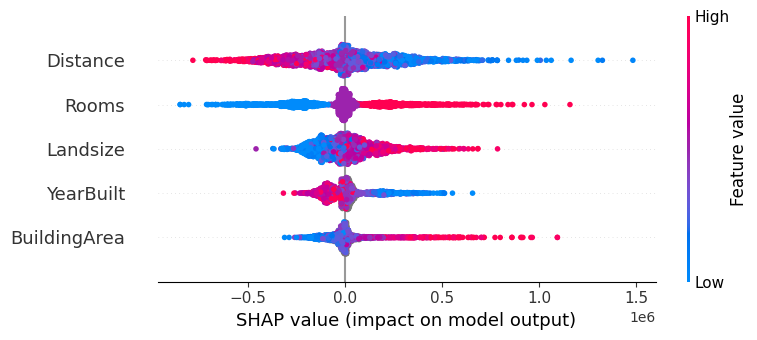

In [ ]:
import shap

# Explain the predictions using SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_val)

# Summary plot
shap.summary_plot(shap_values, X_val)



### **4. SHAP Values**
**Penjelasan:**
- SHAP (SHapley Additive exPlanations) digunakan untuk memahami kontribusi setiap fitur terhadap prediksi individu.
- Fitur **Distance** memberikan kontribusi besar, dengan nilai SHAP positif (mendorong prediksi lebih tinggi) untuk nilai fitur yang besar.
- Fitur seperti **Landsize** dan **BuildingArea** memiliki efek signifikan pada prediksi, baik ke arah positif maupun negatif.
- Warna menunjukkan nilai fitur, dengan **merah** berarti nilai tinggi dan **biru** nilai rendah.

**Kesimpulan:**
- Fitur **Distance** dan **Landsize** sangat mempengaruhi prediksi harga, baik positif maupun negatif tergantung nilainya.
- Rooms memiliki pengaruh lebih kecil, sesuai dengan hasil Feature Importance.


Partial Dependence Plot

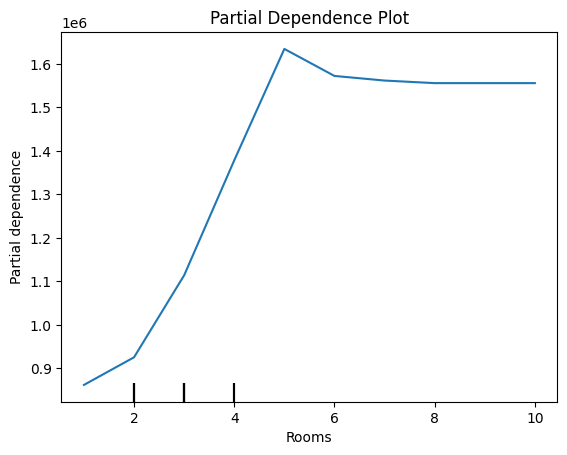

In [ ]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Plot partial dependence for a specific feature
PartialDependenceDisplay.from_estimator(model, X, features=[0])
plt.title('Partial Dependence Plot')
plt.show()


### **5. Partial Dependence Plot**
**Penjelasan:**
- Plot ini menggambarkan hubungan antara fitur **Rooms** dan prediksi harga (`Partial Dependence`).
- Terlihat bahwa penambahan jumlah **Rooms** dari 2 hingga 5 meningkatkan harga properti secara signifikan.
- Setelah 5 **Rooms**, peningkatan harga menjadi stabil dan tidak banyak berubah.

**Kesimpulan:**
- Jumlah **Rooms** memengaruhi harga properti secara signifikan hingga titik tertentu (sekitar 5 kamar).
- Setelah itu, menambah jumlah kamar tidak memberikan dampak besar pada harga.



#Dataset 2 (tugasxgboost.csv)

### 1. Mount Google Drive in Colab

In [ ]:
from google.colab import drive
# Mount Google Drive to access files
drive.mount('/content/drive')

### 2. Read a CSV file from Google Drive into a DataFrame

In [ ]:
import pandas as pd

# Replace 'tugasxgboost.csv' with your file path in Google Drive
file_path = '/content/drive/MyDrive/Week 7/tugasxgboost.csv'
# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
# Display the first few rows of the DataFrame
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3. Select a subset of predictors and the target variable

In [ ]:
# Define predictors (features) and target (label)
predictors = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']
target = ['Class']

# Select predictors (X) and target (y) from the DataFrame
X = data[predictors]
y = data[target]

# Display the first few rows of features and target
X.head(), y.head()

(     X1    X2    X3   X4    X5    X6    X7        X8    X9   X10  X11
 0   7.4  0.70  0.00  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4
 1   7.8  0.88  0.00  2.6  98.0  25.0  67.0    0.9968  3.20  0.68  9.8
 2   7.8  0.76  0.04  2.3  92.0  15.0  54.0  997.0000  3.26  0.65  9.8
 3  11.2  0.28  0.56  1.9  75.0  17.0  60.0  998.0000  3.16  0.58  9.8
 4   7.4  0.70  0.00  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4,
    Class
 0      5
 1      5
 2      5
 3      6
 4      5)

### 4. Split the data into training and validation



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of training and validation splits
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1279, 11), (320, 11), (1279, 1), (320, 1))

### 5. Train the model using XGBoost and print the mean absolute error

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the XGBoost regressor model
model = XGBRegressor(random_state=42)
# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.42633554339408875


### **Model Dasar (Default Parameters)**  
**MAE: 0.4263**  
- **Penjelasan**: Model XGBoost ini dilatih dengan parameter default, seperti jumlah pohon (estimators) 100, dan **learning rate** default sebesar 0.3.  
- **Kelebihan**: Model sederhana ini cukup efektif dengan performa awal yang baik.  
- **Kekurangan**: Model mungkin belum optimal karena parameter seperti jumlah pohon dan learning rate belum disesuaikan.


### 6. Train an XGBRegressor with 500 estimators

In [ ]:
# Initialize the XGBoost regressor with 500 estimators (trees)
model_500 = XGBRegressor(n_estimators=500, random_state=42)
# Train the model on the training data
model_500.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_500 = model_500.predict(X_val)
# Calculate the Mean Absolute Error (MAE)
mae_500 = mean_absolute_error(y_val, y_pred_500)
print(f"Mean Absolute Error (500 estimators): {mae_500}")

Mean Absolute Error (500 estimators): 0.4210454061627388


### **Model dengan 500 Estimators**  
**MAE: 0.4210**  
- **Penjelasan**: Model ini dilatih menggunakan **500 estimators** (jumlah pohon) dengan harapan dapat meningkatkan akurasi prediksi.  
- **Hasil**: MAE menurun dari 0.4263 menjadi **0.4210**, menunjukkan bahwa penambahan jumlah pohon berhasil memperbaiki performa model.  
- **Kelebihan**: Model lebih akurat karena lebih banyak iterasi (pohon) untuk mempelajari pola data.  
- **Kekurangan**: Penambahan jumlah pohon meningkatkan waktu komputasi dan risiko **overfitting**.

### 7. Train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds using DMatrix

In [ ]:
from xgboost import DMatrix, train
from sklearn.metrics import mean_absolute_error

# Flatten the target variables into 1D arrays
y_train_flat = y_train.values.ravel()
y_val_flat = y_val.values.ravel()

# Convert training and validation data into XGBoost's DMatrix format
train_dmatrix = DMatrix(data=X_train, label=y_train_flat)
val_dmatrix = DMatrix(data=X_val, label=y_val_flat)

# Define the parameters for the XGBoost model
params = {
    "objective": "reg:squarederror",  # Regression objective
    "learning_rate": 0.1,  # Custom learning rate
    "max_depth": 6,  # Maximum depth of the trees
    "n_estimators": 90,  # Number of boosting rounds
    "random_state": 42
}

# Train the model with early stopping
model_custom = train(
    params=params,
    dtrain=train_dmatrix,
    num_boost_round=90,
    evals=[(train_dmatrix, "train"), (val_dmatrix, "validation")],
    early_stopping_rounds=10,  # Stop if validation error doesn't improve in 10 rounds
    verbose_eval= False
)

# Make predictions on the validation set
preds = model_custom.predict(val_dmatrix)
# Calculate the Mean Absolute Error (MAE)
mae_custom = mean_absolute_error(y_val_flat, preds)
print(f"Mean Absolute Error (Custom model): {mae_custom}")

Mean Absolute Error (Custom model): 0.44546802788972856


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:02:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)



### **Model dengan Learning Rate Custom dan Early Stopping**  
**MAE: 0.4455**  
- **Penjelasan**: Model ini dilatih menggunakan **learning rate 0.1**, jumlah estimators sebanyak 90, dan **early stopping** dengan 10 ronde jika performa validasi tidak membaik.  
- **Hasil**: MAE meningkat menjadi **0.4455**, sedikit lebih buruk dibandingkan dua model sebelumnya.  
- **Analisis**:  
   - **Learning Rate** yang lebih rendah membuat model belajar lebih lambat, sehingga mungkin tidak sepenuhnya memanfaatkan potensi 90 estimators.  
   - **Early Stopping** menghentikan proses pelatihan lebih awal, yang mencegah model mencapai akurasi maksimal.  
- **Kelebihan**: Early stopping mencegah overfitting dan menghemat waktu komputasi.  
- **Kekurangan**: Early stopping yang terlalu agresif dapat menghentikan pelatihan sebelum model mencapai performa terbaik.

---

### **Kesimpulan Umum**  
- **Model dengan 500 estimators** memiliki performa terbaik (MAE terendah: 0.4210).  
- Penambahan jumlah pohon berhasil meningkatkan performa, tetapi perlu diperhatikan waktu komputasi.  
- **Model dasar** tetap kompetitif, sementara model custom learning rate perlu evaluasi lebih lanjut untuk optimasi.  


### 8. Visualize Feature Importance

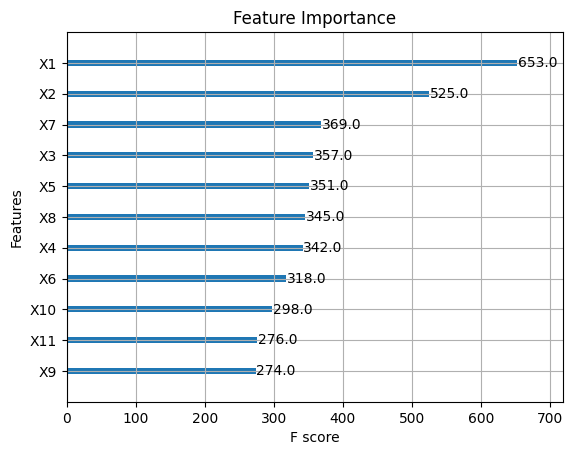

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot the feature importance as determined by the trained model
plot_importance(model)
plt.title("Feature Importance")
plt.show()

### **Feature Importance**  
**Penjelasan:**
- Plot ini menunjukkan seberapa penting setiap fitur dalam mempengaruhi prediksi model XGBoost berdasarkan **F-score**.
- **X1** adalah fitur yang paling penting dengan skor 653, diikuti oleh **X2** (525) dan **X7** (369).
- Fitur-fitur seperti **X11**, **X9**, dan **X10** memiliki pengaruh yang relatif lebih kecil pada prediksi model.

**Kesimpulan:**
- Fokus analisis dapat diarahkan ke fitur **X1**, **X2**, dan **X7** karena memiliki kontribusi signifikan terhadap model.



### 9. Visualize Tree Structure

<Figure size 4000x2000 with 0 Axes>

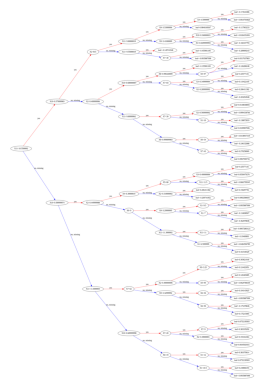

In [ ]:
from xgboost import plot_tree

# Plot the structure of the first decision tree in the model
plt.figure(figsize=(40, 20))  # Increase the figure size for clarity
plot_tree(model, num_trees=0, rankdir='LR')  # Left-to-right layout
plt.show()


### **Tree Structure**  
**Penjelasan:**
- Struktur pohon ini menggambarkan bagaimana model XGBoost membagi data berdasarkan fitur-fitur tertentu pada setiap level.
- Setiap node merepresentasikan kondisi keputusan yang dibuat untuk memisahkan data ke cabang berikutnya.
- Warna merah menunjukkan nilai prediksi yang lebih tinggi, sedangkan warna biru mewakili nilai prediksi yang lebih rendah.

**Kesimpulan:**
- Struktur pohon mencerminkan bagaimana fitur seperti **X1** dan **X2** digunakan pada level awal untuk membagi data, sesuai dengan tingkat kepentingannya dalam **Feature Importance**.


### 10. Learning Curve

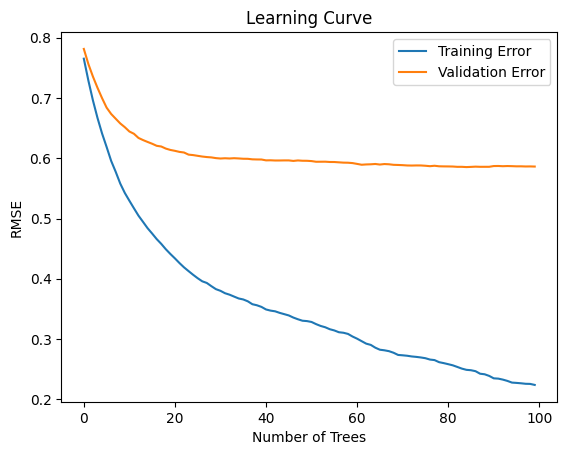

In [ ]:
# Use eval_set to track training and validation performance
eval_set = [(X_train, y_train_flat), (X_val, y_val_flat)]
# Train the model while logging RMSE on training and validation sets
model_learning = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_learning.fit(X_train, y_train_flat, eval_set=eval_set, verbose=False)

# Extract the evaluation results
results = model_learning.evals_result()

# Plot the learning curve for RMSE
plt.plot(results['validation_0']['rmse'], label='Training Error')
plt.plot(results['validation_1']['rmse'], label='Validation Error')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()


### **Learning Curve**  
**Penjelasan:**
- Kurva ini menunjukkan nilai **RMSE (Root Mean Squared Error)** pada training dan validation set terhadap jumlah pohon (trees) yang digunakan.
- **Training Error** (biru) menurun tajam, sementara **Validation Error** (oranye) stabil setelah sekitar 20 pohon.
- Perbedaan antara kedua kurva menunjukkan adanya **overfitting** setelah model mempelajari terlalu banyak detail data training.

**Kesimpulan:**
- Model belajar dengan baik di awal, tetapi mulai **overfitting** setelah sekitar 20-40 pohon, ditandai dengan stagnasi pada error validasi.


### 11. SHAP Values

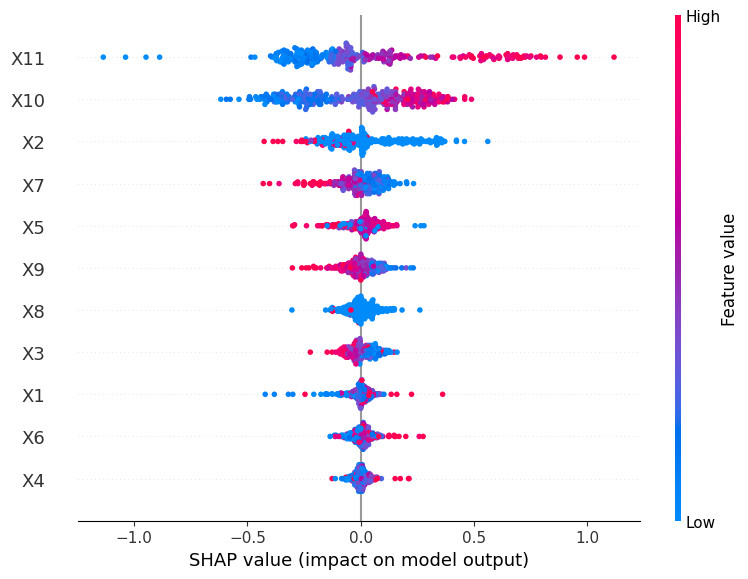

In [ ]:
import shap

# Initialize SHAP explainer for the trained model
explainer = shap.Explainer(model_learning)
# Compute SHAP values for the validation data
shap_values = explainer(X_val)

# Plot the summary of SHAP values to explain feature contributions
shap.summary_plot(shap_values, X_val)



### **SHAP Values**  
**Penjelasan:**
- Plot ini menunjukkan kontribusi setiap fitur terhadap prediksi individu berdasarkan nilai **SHAP**.
- Fitur **X11** dan **X10** memiliki distribusi SHAP yang luas, menunjukkan bahwa keduanya berpengaruh besar pada hasil prediksi.
- Warna merah menunjukkan nilai fitur yang tinggi, sedangkan biru menunjukkan nilai rendah.

**Kesimpulan:**
- **X11**, **X10**, dan **X2** adalah fitur-fitur yang memiliki pengaruh signifikan terhadap prediksi, baik secara positif maupun negatif.
- Fitur dengan nilai SHAP negatif menurunkan hasil prediksi, sementara nilai positif meningkatkan prediksi.


### 12. Partial Dependence Plot

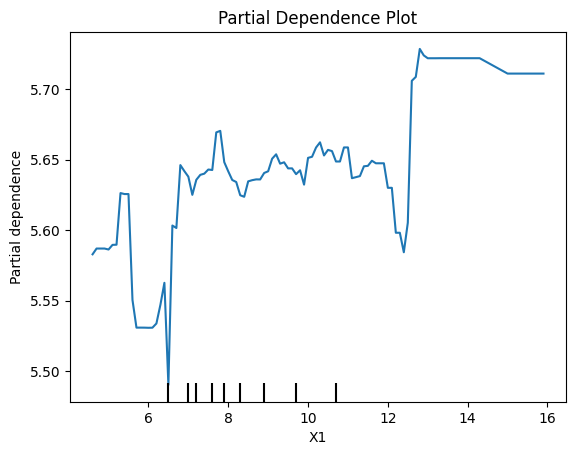

In [ ]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Plot partial dependence for the first feature (X1) to observe its effect
PartialDependenceDisplay.from_estimator(model_learning, X, features=[0])
plt.title('Partial Dependence Plot')
plt.show()


### **Partial Dependence Plot**  
**Penjelasan:**
- Plot ini menggambarkan hubungan antara fitur **X1** dan hasil prediksi model, sambil mengontrol pengaruh fitur lainnya.
- Terlihat adanya pola naik pada prediksi ketika **X1** meningkat, terutama setelah nilai **X1 > 10**.
- Nilai prediksi stabil pada kisaran tertinggi setelah **X1** mencapai sekitar 13.

**Kesimpulan:**
- Fitur **X1** memiliki hubungan positif dengan prediksi model. Peningkatan **X1** cenderung meningkatkan hasil prediksi hingga titik tertentu, di mana pengaruhnya mulai stabil.


#Dataset 3 (tugasxgboost2)

### 1. Mount Google Drive in Colab

In [2]:
from google.colab import drive
# Mount Google Drive to access files
drive.mount('/content/drive')

Mounted at /content/drive


### 2. Read a CSV file from Google Drive into a DataFrame

In [3]:
import pandas as pd

# Replace 'tugasxgboost2.csv' with your file path in Google Drive
file_path = '/content/drive/MyDrive/Week 7/tugasxgboost2.csv'
# Read the CSV file into a DataFrame using the correct separator (semicolon)
data = pd.read_csv(file_path, sep=';')
# Display the first few rows of the DataFrame
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### 3. Select a subset of predictors and the target variable

In [4]:
# Define predictors (features) and target (label)
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
              'pH', 'sulphates', 'alcohol']
target = ['quality']

# Select predictors (X) and target (y) from the DataFrame
X = data[predictors]
y = data[target]

# Display the first few rows of features and target
X.head(), y.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.0              0.27         0.36            20.7      0.045   
 1            6.3              0.30         0.34             1.6      0.049   
 2            8.1              0.28         0.40             6.9      0.050   
 3            7.2              0.23         0.32             8.5      0.058   
 4            7.2              0.23         0.32             8.5      0.058   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 45.0                 170.0   1.0010  3.00       0.45   
 1                 14.0                 132.0   0.9940  3.30       0.49   
 2                 30.0                  97.0   0.9951  3.26       0.44   
 3                 47.0                 186.0   0.9956  3.19       0.40   
 4                 47.0                 186.0   0.9956  3.19       0.40   
 
    alcohol  
 0      8.8  
 1      9.5  
 2     10.1  
 3      9.9  
 4

### 4. Split the data into training and validation

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of training and validation splits
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((3918, 11), (980, 11), (3918, 1), (980, 1))

### 5. Train the model using XGBoost and print the mean absolute error

In [6]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Initialize the XGBoost regressor model
model = XGBRegressor(random_state=42)
# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)
# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.43920797401545


### **Model Dasar (Default Parameters)**  
**MAE: 0.4392**  
- **Penjelasan**:  
  Model XGBoost ini dilatih dengan parameter default, yaitu 100 estimators (jumlah pohon) dan learning rate default sebesar 0.3.  
- **Analisis**:  
  - Model ini memberikan performa awal yang cukup baik dengan MAE sebesar **0.4392**.  
  - Namun, model ini mungkin belum optimal karena parameter seperti jumlah pohon dan learning rate masih menggunakan nilai bawaan.  

**Kesimpulan**:  
Model dasar memiliki performa cukup baik sebagai baseline tetapi masih memiliki ruang untuk peningkatan.



### 6. Train an XGBRegressor with 500 estimators

In [7]:
# Initialize the XGBoost regressor with 500 estimators (trees)
model_500 = XGBRegressor(n_estimators=500, random_state=42)
# Train the model on the training data
model_500.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_500 = model_500.predict(X_val)
# Calculate the Mean Absolute Error (MAE)
mae_500 = mean_absolute_error(y_val, y_pred_500)
print(f"Mean Absolute Error (500 estimators): {mae_500}")

Mean Absolute Error (500 estimators): 0.3922933128415322



### **Model dengan 500 Estimators**  
**MAE: 0.3923**  
- **Penjelasan**:  
  Pada model ini, jumlah estimators (pohon) ditingkatkan menjadi 500. Dengan lebih banyak pohon, model dapat lebih efektif mempelajari pola data.  
- **Analisis**:  
  - Penambahan jumlah pohon berhasil **menurunkan MAE** dari **0.4392** menjadi **0.3923**.  
  - Hal ini menunjukkan bahwa model mampu menangkap pola yang lebih kompleks pada data.  
  - Namun, perlu diperhatikan bahwa peningkatan estimators juga meningkatkan waktu komputasi dan potensi **overfitting** jika tidak dikontrol.  

**Kesimpulan**:  
Model ini memiliki performa terbaik dengan MAE terendah, menandakan bahwa penambahan jumlah pohon membantu meningkatkan akurasi prediksi.



### 7. Train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds using DMatrix

In [9]:
from xgboost import DMatrix, train
from sklearn.metrics import mean_absolute_error

# Flatten the target variables into 1D arrays
y_train_flat = y_train.values.ravel()
y_val_flat = y_val.values.ravel()

# Convert training and validation data into XGBoost's DMatrix format
train_dmatrix = DMatrix(data=X_train, label=y_train_flat)
val_dmatrix = DMatrix(data=X_val, label=y_val_flat)

# Define the parameters for the XGBoost model
params = {
    "objective": "reg:squarederror",  # Regression objective
    "learning_rate": 0.1,  # Custom learning rate
    "max_depth": 6,  # Maximum depth of the trees
    "n_estimators": 90,  # Number of boosting rounds
    "random_state": 42
}

# Train the model with early stopping
model_custom = train(
    params=params,
    dtrain=train_dmatrix,
    num_boost_round=90,
    evals=[(train_dmatrix, "train"), (val_dmatrix, "validation")],
    early_stopping_rounds=10,  # Stop if validation error doesn't improve in 10 rounds
    verbose_eval=False
)

# Make predictions on the validation set
preds = model_custom.predict(val_dmatrix)
# Calculate the Mean Absolute Error (MAE)
mae_custom = mean_absolute_error(y_val_flat, preds)
print(f"Mean Absolute Error (Custom model): {mae_custom}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:57:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Absolute Error (Custom model): 0.49502970831734794




### **Model dengan Learning Rate Custom, 90 Estimators, dan Early Stopping**  
**MAE: 0.4950**  
- **Penjelasan**:  
  Model ini dilatih menggunakan learning rate **0.1** (lebih rendah dari default), estimators sebanyak **90**, dan **early stopping** dengan 10 ronde.  
- **Analisis**:  
  - Meskipun learning rate yang rendah membantu model belajar lebih perlahan, jumlah estimators yang lebih sedikit (90) mengakibatkan model kurang mampu menangkap pola kompleks dalam data.  
  - **Early stopping** juga mungkin menghentikan pelatihan lebih cepat sebelum model mencapai performa optimal.  
  - Akibatnya, MAE meningkat menjadi **0.4950**, lebih tinggi dibandingkan model dasar dan model dengan 500 estimators.  

**Kesimpulan**:  
Model ini mengalami underfitting karena jumlah estimators yang lebih sedikit dan early stopping yang mungkin terlalu agresif.


### 8. Visualize Feature Importance

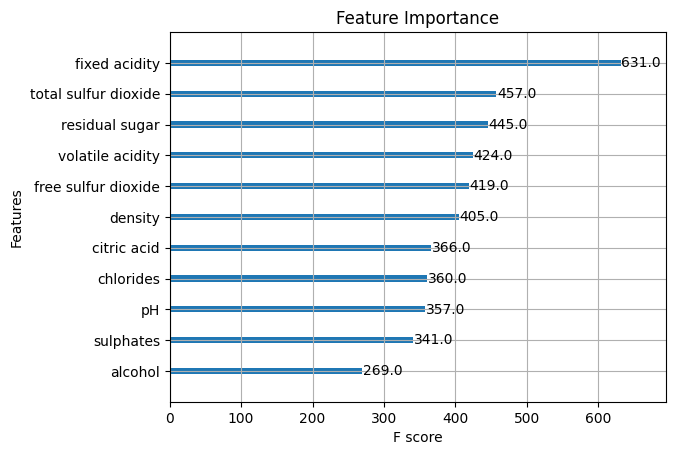

In [10]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot the feature importance as determined by the trained model
plot_importance(model)
plt.title("Feature Importance")
plt.show()


### **Feature Importance**  
**Penjelasan:**  
- Grafik ini menunjukkan fitur-fitur paling penting berdasarkan kontribusi mereka terhadap prediksi model (**F-score**).  
- **fixed acidity** memiliki F-score tertinggi (**631.0**), diikuti oleh **total sulfur dioxide** (**457.0**) dan **residual sugar** (**445.0**).  
- Fitur **alcohol** memiliki kontribusi paling kecil (**269.0**) dibandingkan fitur lainnya.

**Kesimpulan:**  
- Fitur **fixed acidity**, **total sulfur dioxide**, dan **residual sugar** adalah faktor dominan yang digunakan oleh model untuk memprediksi target (**quality**).  
- Fitur **alcohol** meskipun penting, memiliki pengaruh paling kecil dalam hasil prediksi.


### 9. Visualize Tree Structure

<Figure size 4000x2000 with 0 Axes>

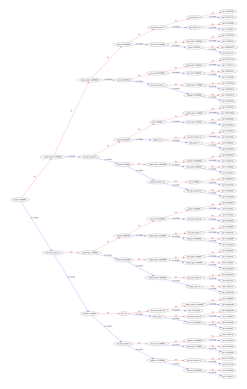

In [11]:
from xgboost import plot_tree

# Plot the structure of the first decision tree in the model
plt.figure(figsize=(40, 20))  # Increase the figure size for clarity
plot_tree(model, num_trees=0, rankdir='LR')  # Left-to-right layout
plt.show()


### **Visualisasi Struktur Pohon**  
**Penjelasan:**  
- Struktur pohon ini menunjukkan bagaimana model XGBoost membuat keputusan berdasarkan fitur-fitur tertentu.  
- Setiap node merepresentasikan kondisi pemisahan data berdasarkan nilai fitur tertentu.  
- Warna **merah** menunjukkan nilai yang lebih tinggi, sedangkan **biru** menunjukkan nilai yang lebih rendah.

**Kesimpulan:**  
- Fitur seperti **fixed acidity** dan **total sulfur dioxide** sering muncul di bagian awal pohon, menunjukkan pentingnya fitur ini dalam membagi data.  
- Cabang pohon yang mendalam menandakan model mempelajari pola yang kompleks dalam data.


### 10. Learning Curve

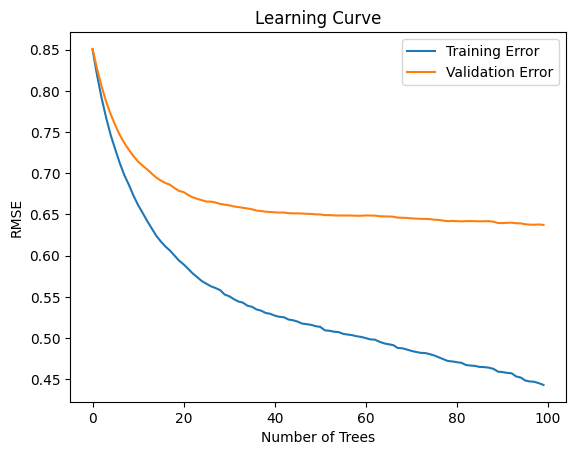

In [12]:
# Use eval_set to track training and validation performance
eval_set = [(X_train, y_train_flat), (X_val, y_val_flat)]
# Train the model while logging RMSE on training and validation sets
model_learning = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_learning.fit(X_train, y_train_flat, eval_set=eval_set, verbose=False)

# Extract the evaluation results
results = model_learning.evals_result()

# Plot the learning curve for RMSE
plt.plot(results['validation_0']['rmse'], label='Training Error')
plt.plot(results['validation_1']['rmse'], label='Validation Error')
plt.xlabel('Number of Trees')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend()
plt.show()


### **Learning Curve**  
**Penjelasan:**  
- Kurva ini menunjukkan nilai **RMSE** untuk data training (garis biru) dan validation (garis oranye) seiring bertambahnya jumlah pohon (trees).  
- **Training Error** terus menurun, menunjukkan model semakin memahami data training.  
- **Validation Error** turun dengan cepat di awal dan kemudian stabil setelah sekitar 40-50 pohon.

**Kesimpulan:**  
- Model belajar dengan baik, namun terdapat **gap** antara training error dan validation error, yang menunjukkan potensi **overfitting**.  
- Setelah sekitar 50 pohon, menambah lebih banyak pohon tidak lagi secara signifikan mengurangi error pada data validasi.


### 11. SHAP Values

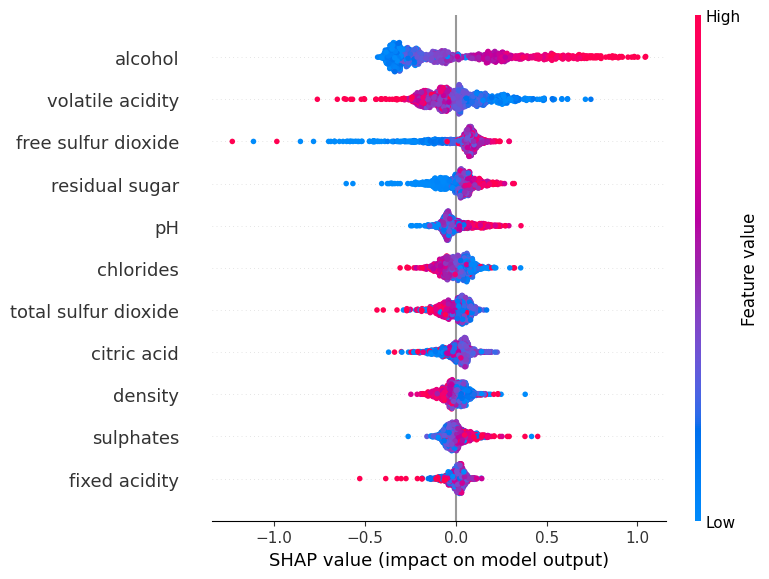

In [13]:
import shap

# Initialize SHAP explainer for the trained model
explainer = shap.Explainer(model_learning)
# Compute SHAP values for the validation data
shap_values = explainer(X_val)

# Plot the summary of SHAP values to explain feature contributions
shap.summary_plot(shap_values, X_val)


### **SHAP Values**  
**Penjelasan:**  
- Grafik ini menunjukkan kontribusi masing-masing fitur terhadap prediksi model dalam setiap sampel.  
- **alcohol**, **volatile acidity**, dan **free sulfur dioxide** memiliki distribusi SHAP yang signifikan, menunjukkan pengaruh kuat terhadap prediksi.  
- Warna **merah** menunjukkan nilai fitur tinggi, sementara warna **biru** menunjukkan nilai fitur rendah.

**Interpretasi:**  
- Fitur **alcohol** dengan nilai tinggi cenderung meningkatkan prediksi kualitas (nilai SHAP positif).  
- Fitur seperti **volatile acidity** dan **chlorides** memiliki dampak negatif ketika nilainya tinggi (nilai SHAP negatif).

**Kesimpulan:**  
- SHAP values membantu mengidentifikasi kontribusi positif dan negatif fitur terhadap hasil prediksi.  
- Fitur **alcohol** dan **volatile acidity** memberikan dampak signifikan terhadap target (**quality**).


### 12. Partial Dependence Plot

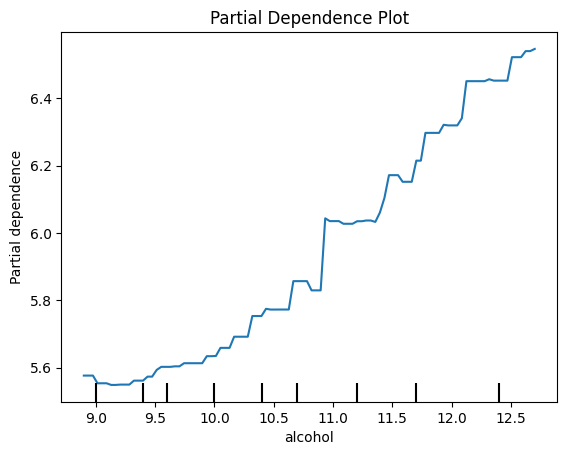

In [14]:
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

# Plot partial dependence for the first feature (alcohol) to observe its effect
PartialDependenceDisplay.from_estimator(model_learning, X, features=['alcohol'])
plt.title('Partial Dependence Plot')
plt.show()


### **Partial Dependence Plot**  
**Penjelasan:**  
- Plot ini menggambarkan hubungan antara fitur **alcohol** dan prediksi model dengan mengontrol pengaruh fitur lainnya.  
- Peningkatan nilai **alcohol** berkorelasi positif dengan peningkatan prediksi kualitas (**Partial Dependence**).  
- Terlihat lonjakan signifikan setelah nilai **alcohol** mencapai sekitar 11, di mana kualitas prediksi meningkat tajam.

**Kesimpulan:**  
- Fitur **alcohol** memiliki hubungan positif kuat terhadap target (**quality**). Semakin tinggi nilai **alcohol**, semakin tinggi prediksi kualitas.  
- Hal ini konsisten dengan hasil Feature Importance dan SHAP Values, yang menunjukkan **alcohol** sebagai salah satu fitur signifikan.
